In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

In [2]:
filter_rare = pd.read_csv('../data/filter_rare.csv', index_col=0)
filter_rare

,group,region,study_site,Acetatifactor,Acetivibrio,Acidaminococcus,Acinetobacter,Actinomyces,Acutalibacter,Adlercreutzia,...,UCG-003,UCG-004,UCG-005,UCG-009,UCG-010,Varibaculum,Veillonella,Weissella,Xanthomonas,Unclassified
SRR4457864,0,0,1,0.0,0.0,0.000000,0.0,0.026594,0.0,0.033847,...,0.055605,0.0,0.834079,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.640935
SRR4457873,0,0,1,0.0,0.0,0.000000,0.0,0.016925,0.0,0.000000,...,0.198259,0.0,0.041103,0.000000,0.009671,0.0,0.043520,0.0,0.0,7.630561
SRR4457876,0,0,1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.192395,0.0,0.033523,0.000000,0.000000,0.0,0.119518,0.0,0.0,7.448002
SRR4457877,0,0,1,0.0,0.0,0.000000,0.0,0.019861,0.0,0.000000,...,0.465969,0.0,0.200137,0.000000,0.000000,0.0,0.000000,0.0,0.0,6.459400
SRR4457878,0,0,1,0.0,0.0,0.000000,0.0,0.037431,0.0,0.034935,...,0.416729,0.0,1.766732,0.064880,0.137246,0.0,0.000000,0.0,0.0,7.031991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR24874401,1,1,14,0.0,0.0,0.000000,0.0,0.262331,0.0,0.000000,...,0.274705,0.0,0.009899,0.000000,0.000000,0.0,0.064345,0.0,0.0,25.423813
SRR24874402,1,1,14,0.0,0.0,0.000000,0.0,0.035169,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.189523,0.0,0.0,3.704500
SRR24874404,1,1,14,0.0,0.0,0.000000,0.0,0.474964,0.0,0.155638,...,0.000000,0.0,0.037568,0.000000,0.000000,0.0,0.110020,0.0,0.0,1.894488
SRR24874405,1,1,14,0.0,0.0,0.003387,0.0,0.279429,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.450473,0.0,0.0,0.111772


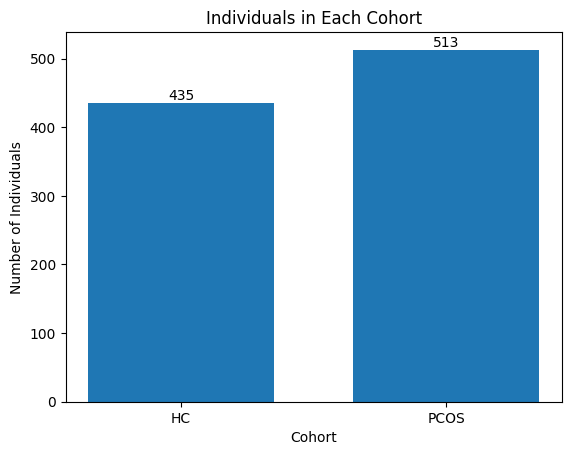

In [35]:
# how many samples in each cohort/group?
fig, ax = plt.subplots()
cohort_size = filter_rare.groupby('group').count().reset_index()[['group', 'region']]
bars = ax.bar(cohort_size['group'], cohort_size['region'], width=0.7)
ax.set_title('Individuals in Each Cohort')
ax.set_xlabel('Cohort')
ax.set_ylabel('Number of Individuals')
ax.set_xticks([0, 1], labels=['HC', 'PCOS'])
ax.bar_label(bars)
plt.show()

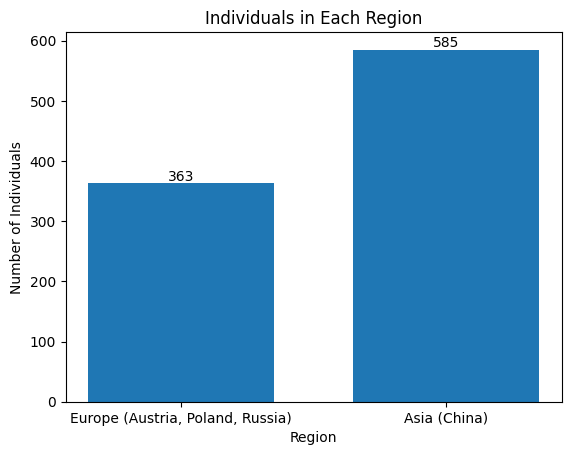

In [45]:
# how many samples in each region?
fig, ax = plt.subplots()
cohort_size = filter_rare.groupby('region').count().reset_index()[['region', 'group']]
bars = ax.bar(cohort_size['region'], cohort_size['group'], width=0.7)
ax.set_title('Individuals in Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Individuals')
ax.set_xticks([0, 1], labels=['Europe (Austria, Poland, Russia)', 'Asia (China)'])
ax.bar_label(bars)
plt.show()

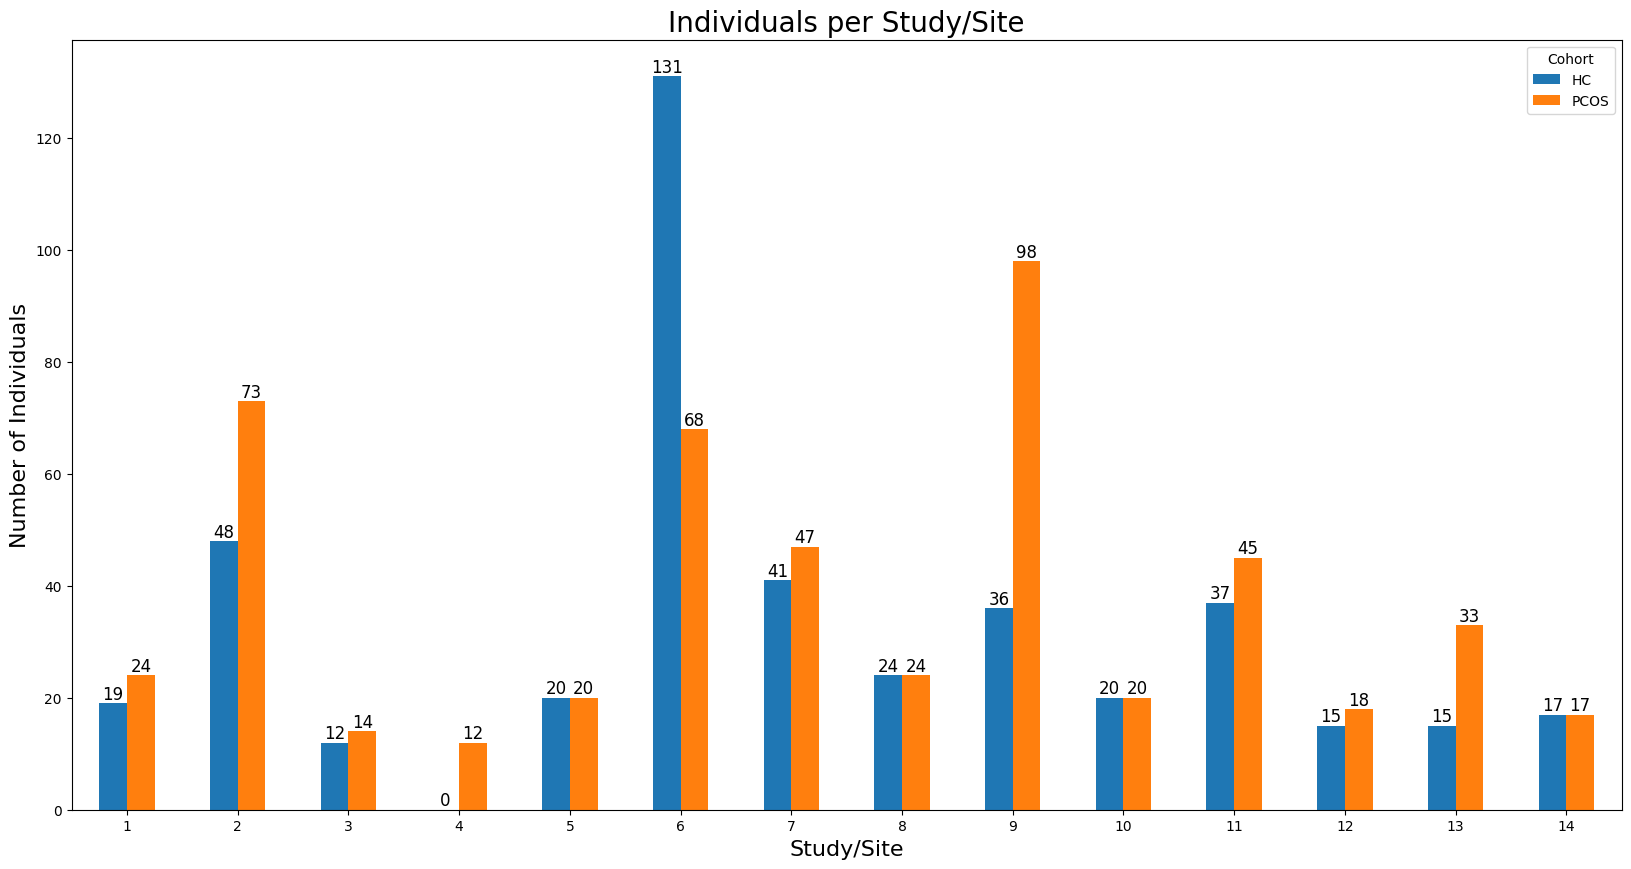

In [42]:
# number of participants per study
fig, ax = plt.subplots(figsize=(20, 10))
study_size = filter_rare.pivot_table(index='study_site', columns='group', aggfunc='size')
study_size.plot(kind='bar', rot=0, ax=ax)
ax.set_title('Individuals per Study/Site', fontsize=20)
ax.set_xlabel('Study/Site', fontsize=16)
ax.set_ylabel('Number of Individuals', fontsize=16)
for container in ax.containers: 
    ax.bar_label(container, fontsize=12)
ax.legend(title='Cohort', labels=['HC', 'PCOS'])
plt.show()

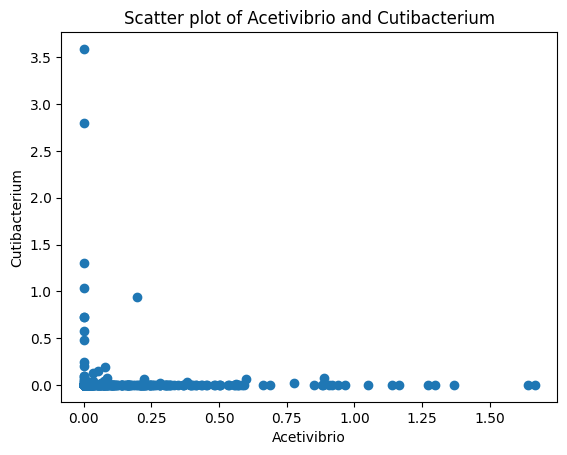

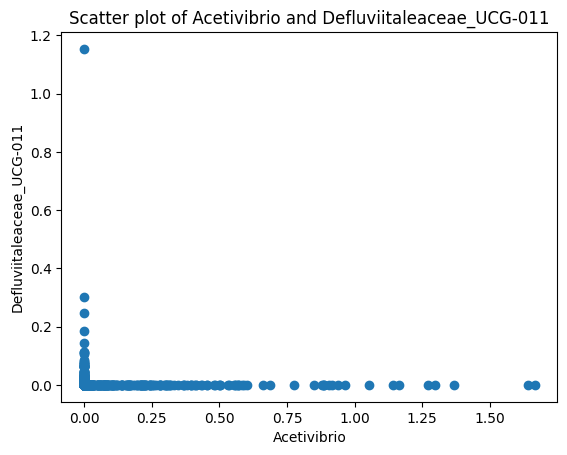

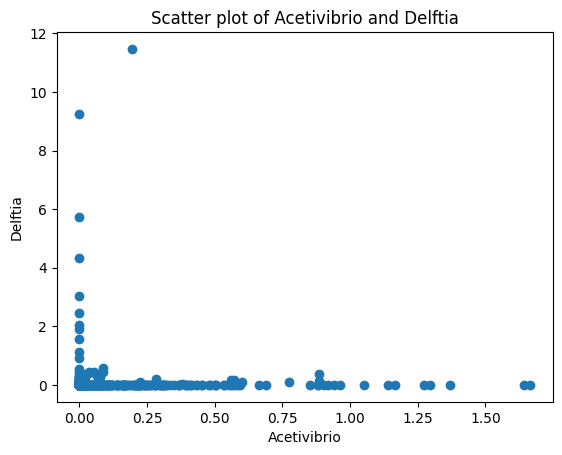

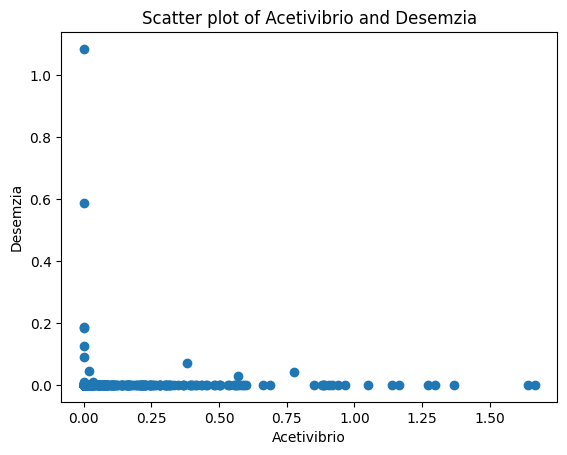

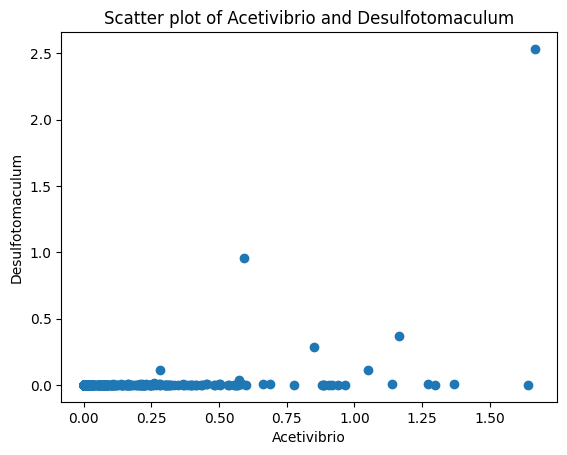

In [58]:
# linearity (take first 10)
gut_16s = filter_rare.iloc[:, 3:]

pairs_gut16s = list(itertools.combinations(gut_16s.columns, 2))

# for i in range(len(pairs_gut16s[350:355])):
for i in range(350, 355):
    fig, ax = plt.subplots()
    x = pairs_gut16s[i][0]
    y = pairs_gut16s[i][1]
    ax.scatter(x = gut_16s[x], y = gut_16s[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'Scatter plot of {x} and {y}')
    plt.show()

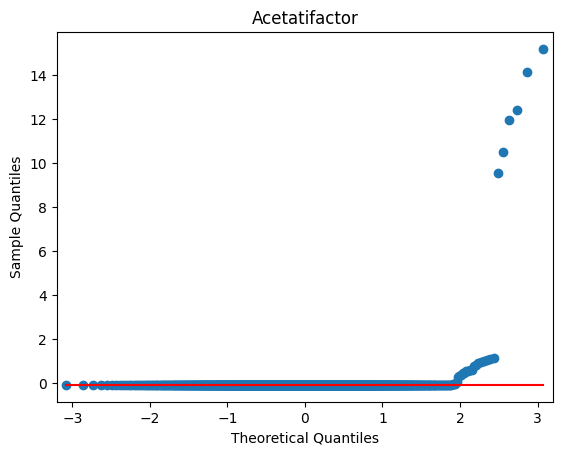

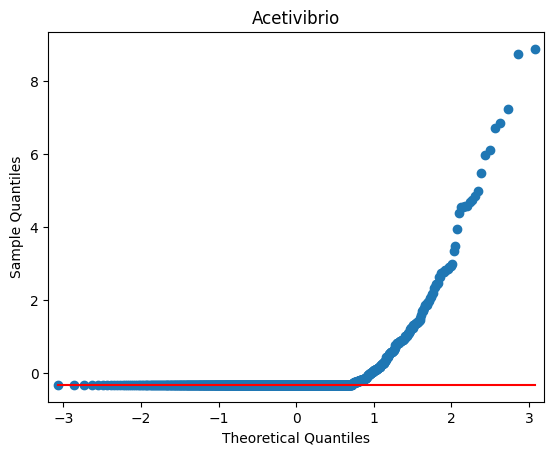

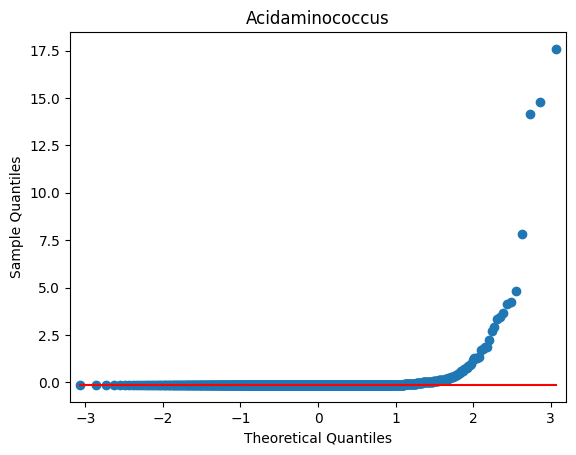

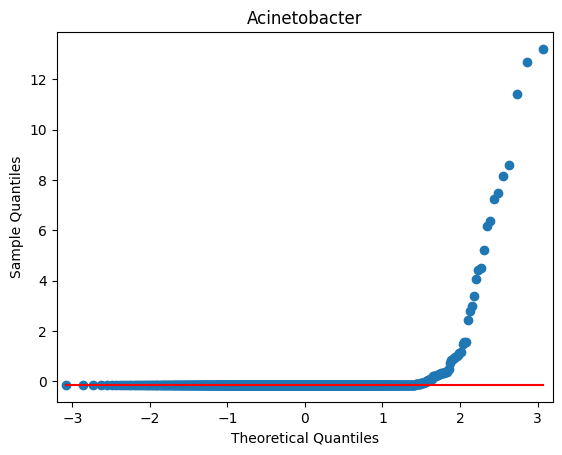

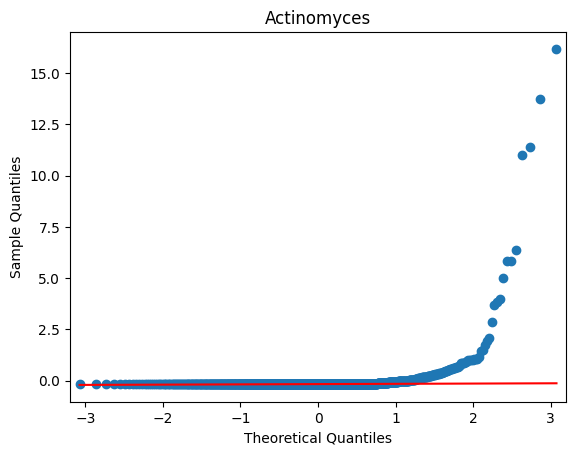

In [54]:
# normality (take first 10)
for i in range(len(gut_16s.columns[:5])):
    fig, ax = plt.subplots()
    sm.qqplot(gut_16s.iloc[:, i], line='q', fit=True, ax=ax)
    ax.set_title(gut_16s.columns[i])
    plt.show()

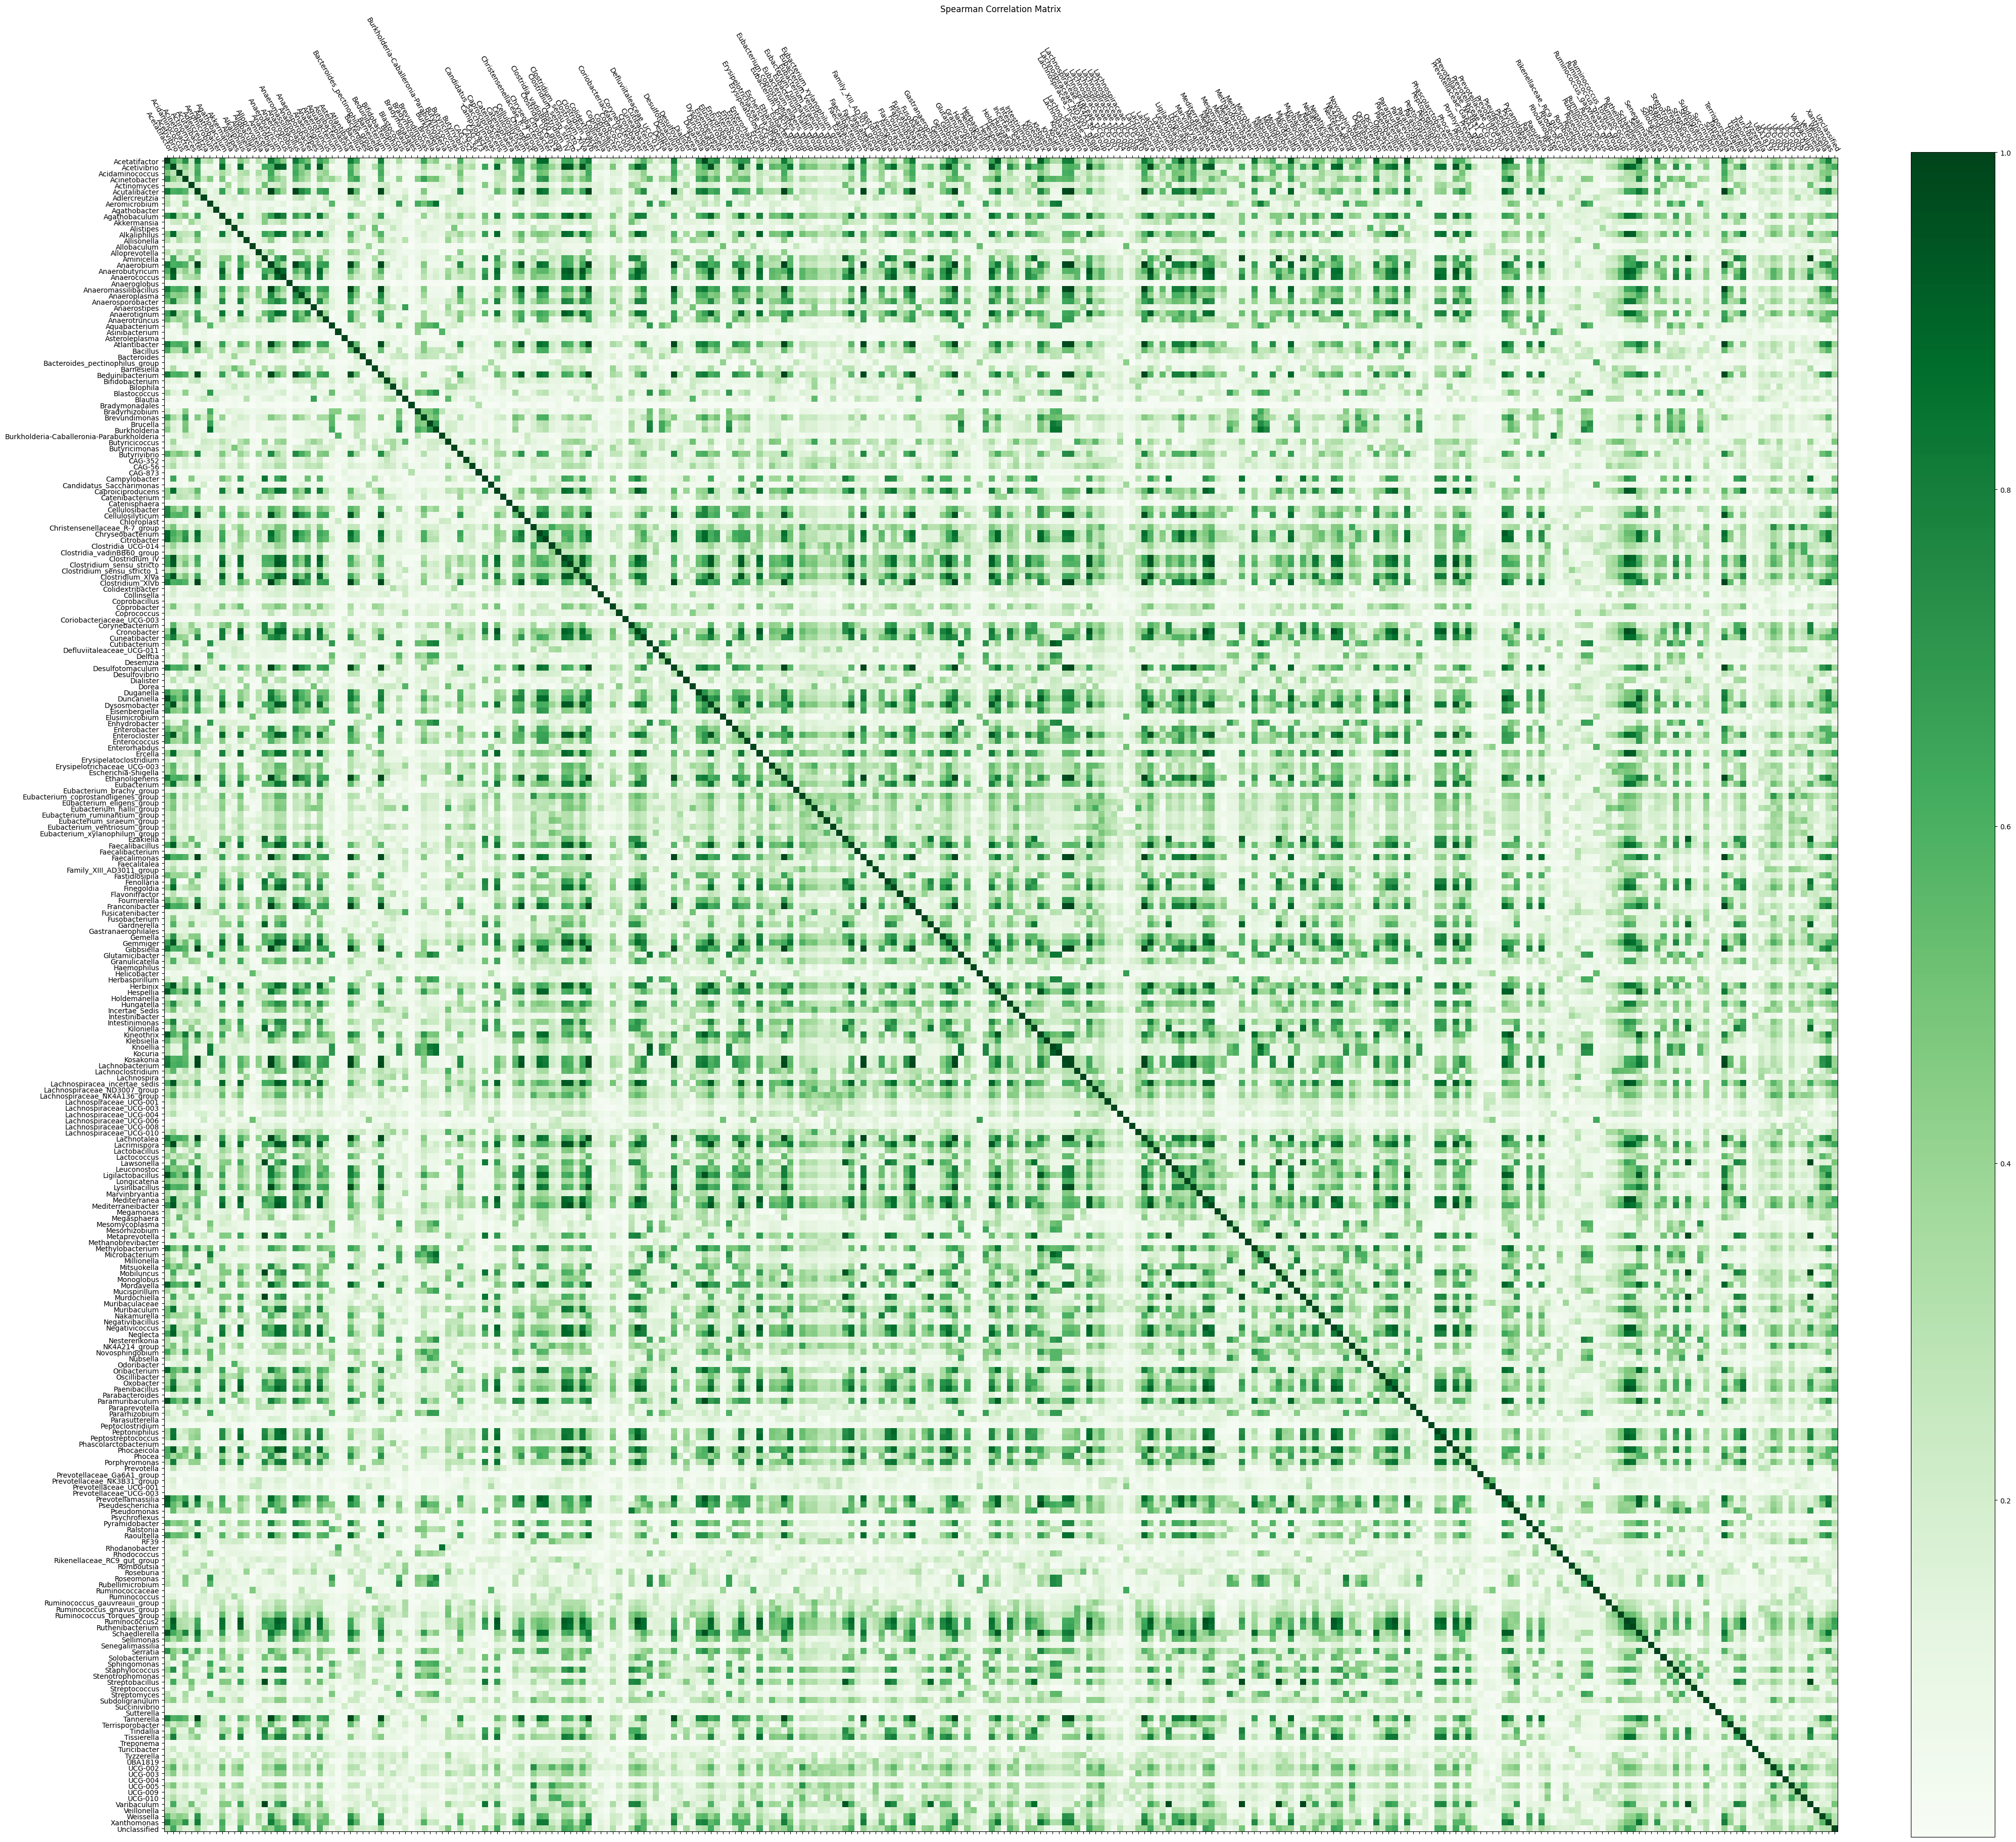

In [73]:
# correlation matrix
fig, ax = plt.subplots(figsize=(40, 40))
cax = ax.matshow(abs(gut_16s.corr(method='spearman')), cmap='Greens')
fig.colorbar(cax, fraction=0.046, pad=0.04)

xaxis = np.arange(len(gut_16s.columns))
ax.set_xticks(xaxis, labels=list(gut_16s.columns))
ax.set_yticks(xaxis, labels=list(gut_16s.columns))
ax.set_title('Spearman Correlation Matrix')

plt.setp(ax.get_xticklabels(), rotation=-60, ha='right', rotation_mode='anchor')

fig.tight_layout()

In [78]:
274 / np.log(274)

np.float64(48.8141362190134)